# <u><b><i><center>DAP PROJECT - Analysing 2023 Annual Stack Overflow Survey Results </center></i></b></u>

In [334]:
import pandas as pd
from pandas import read_csv
import seaborn as sns 
import matplotlib.pyplot as plt
import operator
import re
from scipy.stats.mstats import winsorize
from scipy.stats import mstats
import plotly.express as px

# CONFIGURATIONS 
pd.set_option('display.max_columns', 90)

## -- <i>DATA FILE SETTING UP AND CONFIGURATION</i> -- 


In [160]:
schema = read_csv('survey_results_schema.csv')
data = read_csv('survey_results_public.csv')

data.set_index('ResponseId', inplace=True)
data.rename(columns = {'CompTotal': 'Salary', 'ConvertedCompYearly': 'Total_Salary'}, inplace=True)

In [5]:
# DROP & CLEAN
data.drop(columns=['Q120'], inplace=True)

In [6]:
data.shape

(89184, 82)

In [133]:
data.describe()

,Salary,WorkExp,Total_Salary
count,4.822500e+04,43579.000000,4.801900e+04
mean,1.036807e+42,11.405126,1.031101e+05
std,2.276847e+44,9.051989,6.814188e+05
min,0.000000e+00,0.000000,1.000000e+00
25%,6.300000e+04,5.000000,4.390700e+04
50%,1.150000e+05,9.000000,7.496300e+04
75%,2.300000e+05,16.000000,1.216410e+05
max,5.000000e+46,50.000000,7.435143e+07


### <i>Custom Aggregate functions :- </i>

In [265]:
# Function to populate the dictionary
import pandas as pd
import operator
def populateDict(data: pd.core.series.Series, delimiter=';', dropna=True, sortbyVals=False):
    _dict = {}
    if dropna:
        data = data.dropna()

    for i in data:
        splitted = i.split(delimiter)
        for j in splitted:
            _dict[j] = _dict.get(j, 0) + 1

    if sortbyVals:
        _dict = dict(sorted(_dict.items(), key=operator.itemgetter(1), reverse=True))

    return _dict


def ageGroupConvert(data:pd.core.series.Series):
    for i in data:
        regex_pattern = r"^([\d]{2})-([\d]{2})"
        result = re.search(regex_pattern, i).groups()
        if result:
            print(result)
def _range(data:pd.core.series.Series):
    return data.max() - data.min()
    

### - <i>Distributions of survey participants according to their country</i> -

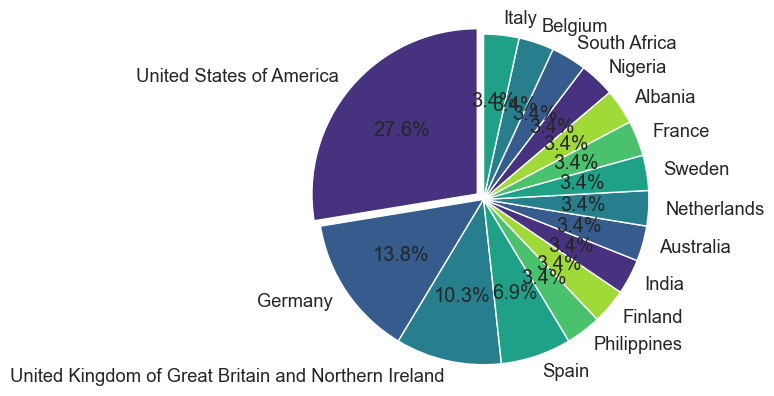

In [162]:
# took only first 20 values for better visualisation
consideration = 30
countryDistributions = dict(data['Country'].head(consideration).value_counts(normalize=True)) 
countries, counts = map(list, zip(*countryDistributions.items()))

# Wedge out first country
myExplode = [0.05 if i == 0  else 0 for i in range(len(countries))]

fig, ax = plt.subplots()
ax.pie(counts, labels=countries, autopct='%1.1f%%', startangle=90,colors=sns.color_palette('viridis'), explode=myExplode)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.show()


> <em> 
    CONCLUSIONS: From above observation we can see that most percentage of people who participated in the survey were from United States, followed by Germany, UK and Spain. We can also observe that countries from Philippines : Italy have participated in approximately same proportions (3.4%).
 <em>

### <i>*- Variability in Salary in a country -*</i>

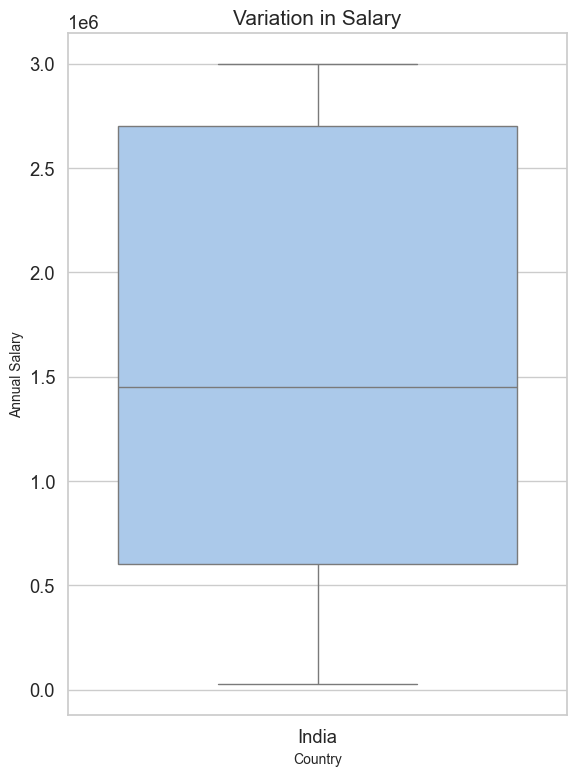

In [250]:
country = ['India']

filtered_data = data.dropna(subset=['Salary'])
filtered_data.loc[:, 'Salary'] = winsorize(filtered_data['Salary'], limits=[0.05, 0.05])
filtered_data_top_5 = filtered_data[filtered_data['Country'].isin(country)]

plt.figure(figsize=(6, 8))
sns.boxplot(x='Country', y='Salary', hue='Country', data=filtered_data_top_5, palette='pastel', showfliers=False)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Annual Salary', fontsize=10)
plt.title('Variation in Salary', fontsize=15)
plt.tight_layout()
plt.show()

> <em> 
    CONCLUSIONS: From above box plot we can see the variation of salary of a particular country. The line in the middle represents the median and the edges of the box represents the 3rd and 1st quantiles from top to bottom respectively. The black lines at top and bottom represent the Maximum and Mininum values of the salary respectively.
 <em>

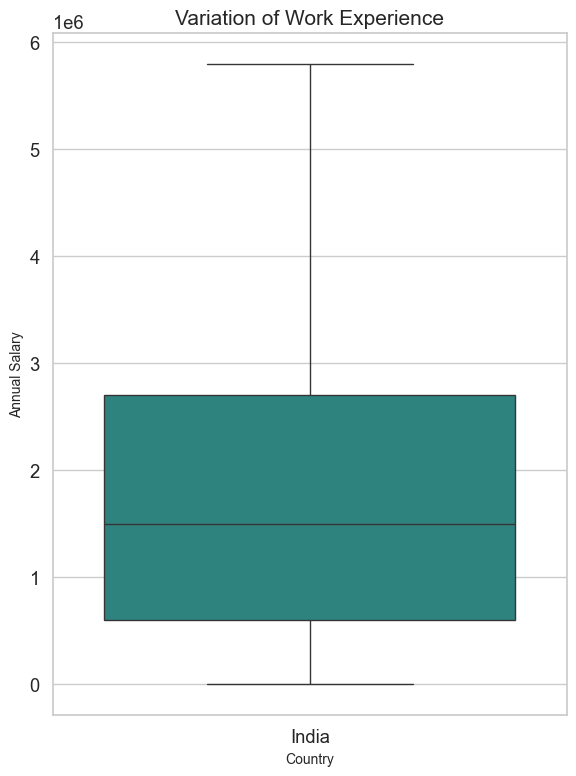

In [245]:
country = ['India']

filtered_data = data.dropna(subset=['WorkExp'])
filtered_data_top_5 = filtered_data[filtered_data['Country'].isin(country)]

plt.figure(figsize=(6, 8))
sns.boxplot(x='Country', y='Salary', hue='Country', data=filtered_data_top_5, palette='viridis', showfliers=False)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Annual Salary', fontsize=10)
plt.title('Variation of Work Experience', fontsize=15)
plt.tight_layout()
plt.show()

### <i>*- Mean, Median, Mode and Range of numerical Data Types in the dataset-*</i>

In [262]:
numerical = data.select_dtypes(include=[int,float])
numerical.mean()

Salary          1.036807e+42
WorkExp         1.140513e+01
Total_Salary    1.031101e+05
dtype: float64

In [276]:
numerical.median()

Salary          115000.0
WorkExp              9.0
Total_Salary     74963.0
dtype: float64

In [275]:
numerical.mode()

,Salary,WorkExp,Total_Salary
0,100000.0,5.0,64254.0


In [272]:
print("Salary\t\t: ", _range(numerical['Salary']))
print("WorkExp\t\t: ", _range(numerical['WorkExp']))
print("Total_Salary\t: ", _range(numerical['Total_Salary']))

Salary		:  4.999999999999999e+46
WorkExp		:  50.0
Total_Salary	:  74351431.0


### <i>*- Educations level of candidates who participated in survey -*</i>

<class 'pandas.core.series.Series'>


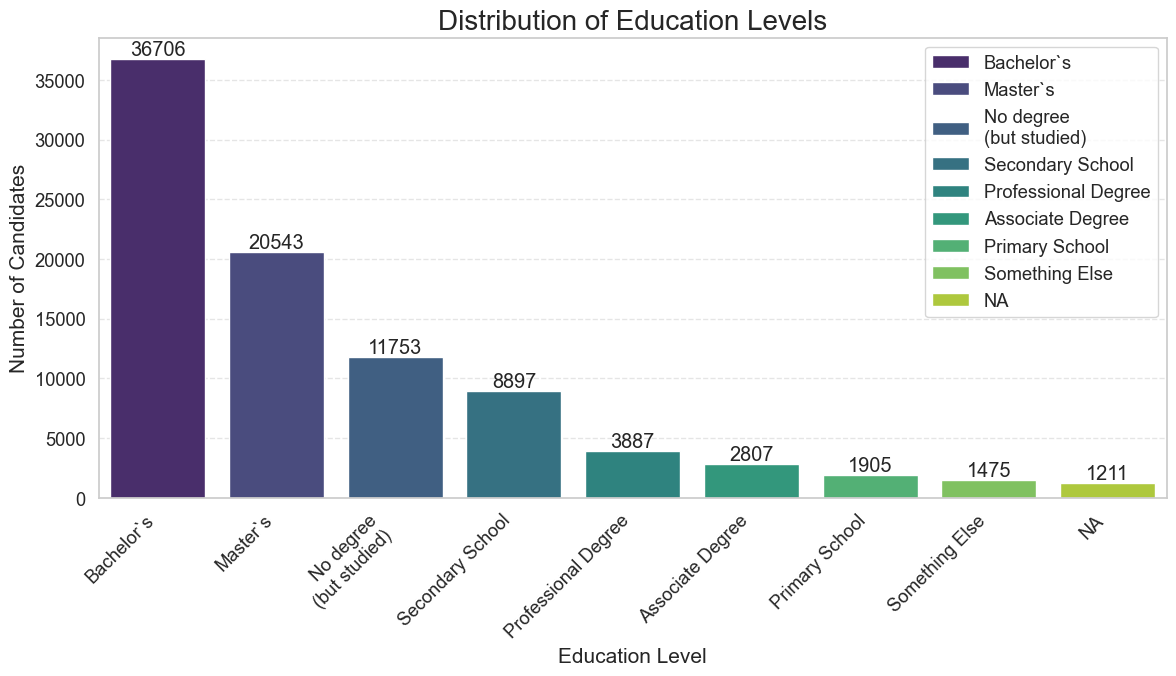

In [219]:
# data['EdLevel'].unique()

data['EdLevel'].fillna("NA", inplace=True)
educationData = data['EdLevel']

print(type(educationData))

# educationCounts = {}
# for i in data['EdLevel']:
#     educationCounts[i] = educationCounts.get(i, 0) + 1

# # Sorting Dictionary
# educationCounts = sorted(educationCounts.items(), key=operator.itemgetter(1), reverse=True)

educationCounts = populateDict(educationData, ';', sortbyVals=True)

levels, counts = map(list, zip(*educationCounts.items()))

# Custom labels for better readability
custom_labels = ['Bachelor`s',
                 'Master`s',
                 'No degree\n(but studied)',
                 'Secondary School',
                 'Professional Degree',
                 'Associate Degree',
                 'Primary School',
                 'Something Else',
                 'NA']

# Create a Seaborn bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=custom_labels, y=counts, hue=custom_labels, palette="viridis", dodge=False, legend=True)

# Adding data labels on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel("Education Level", fontsize=15)
plt.ylabel("Number of Candidates", fontsize=15)
plt.title("Distribution of Education Levels", fontsize=20)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

> <em> 
    CONCLUSIONS: 
    Candidates With Bacherlor`s degree were the one`s who participated most in the survey along with Master`s degree holders, more dominant in survey and seem to be using the platform to a larger Extent. <em>

### <i>*- Age Distributions of Candidates -*</i>

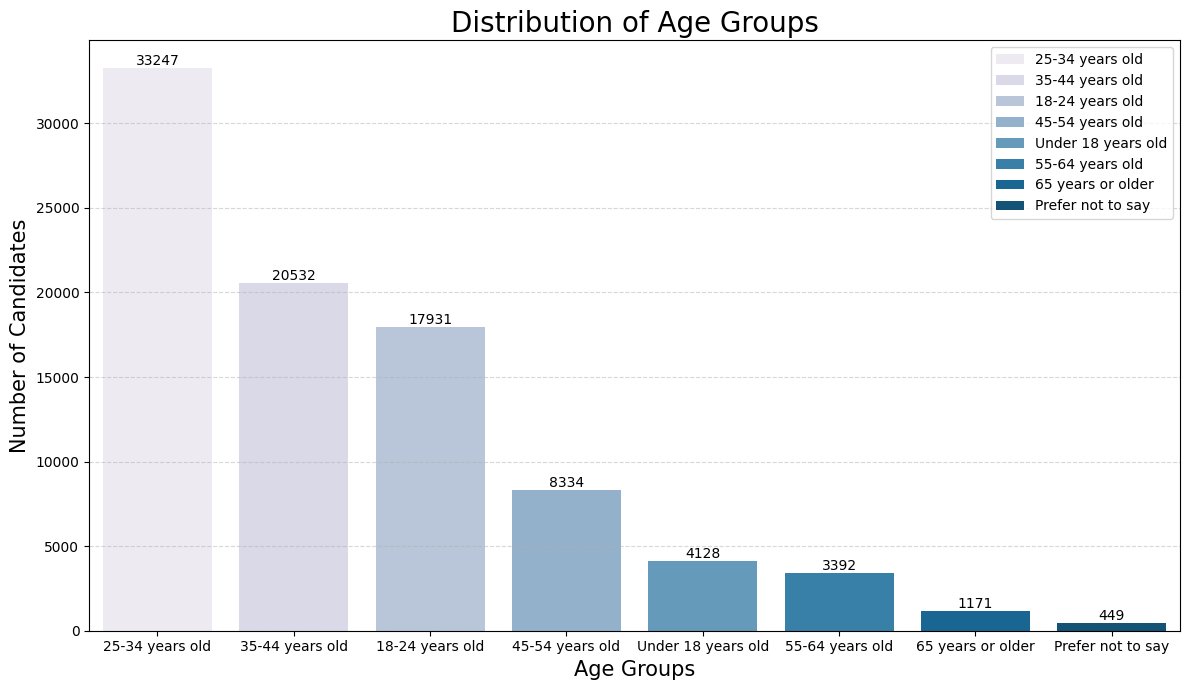

In [34]:
ageDistributions = dict(data['Age'].value_counts(sort=True))
ageRegexPattern = r'^([\d]{2})-([\d]{2})'

# for ageGrp in data['Age']:
#     result = re.search(ageRegexPattern, ageGrp)
#     if result:
#         ages = result.group(0)
#         ageDistributions[ages] = ageDistributions.get(ages, 0) + 1
#     else:
#         pass

# Extracting labels and counts
ageLabels = list(ageDistributions.keys())
counts = list(ageDistributions.values())


# Bar Plot
plt.figure(figsize=(12, 7))
sns.barplot(x=ageLabels, y=counts, hue=ageLabels, palette="PuBu", dodge=False, legend=True)

# Adding data labels on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel("Age Groups", fontsize=15)
plt.ylabel("Number of Candidates", fontsize=15)
plt.title("Distribution of Age Groups", fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


> <em>CONCLUSION: People under 25 - 34 years age group are most prominent participants in the survey, along with 18 - 24 year group & 35 - 44 year groups. Older people and people below 18 are less keen in participation. </em>

### <i>*- Popularity of Programming Languages or Most used Programming Language in 2023 -*</i>

In [35]:
languages = data['LanguageHaveWorkedWith'].dropna()

progLangDict = dict(sorted(progLangDict.items(), key=operator.itemgetter(1), reverse=True))

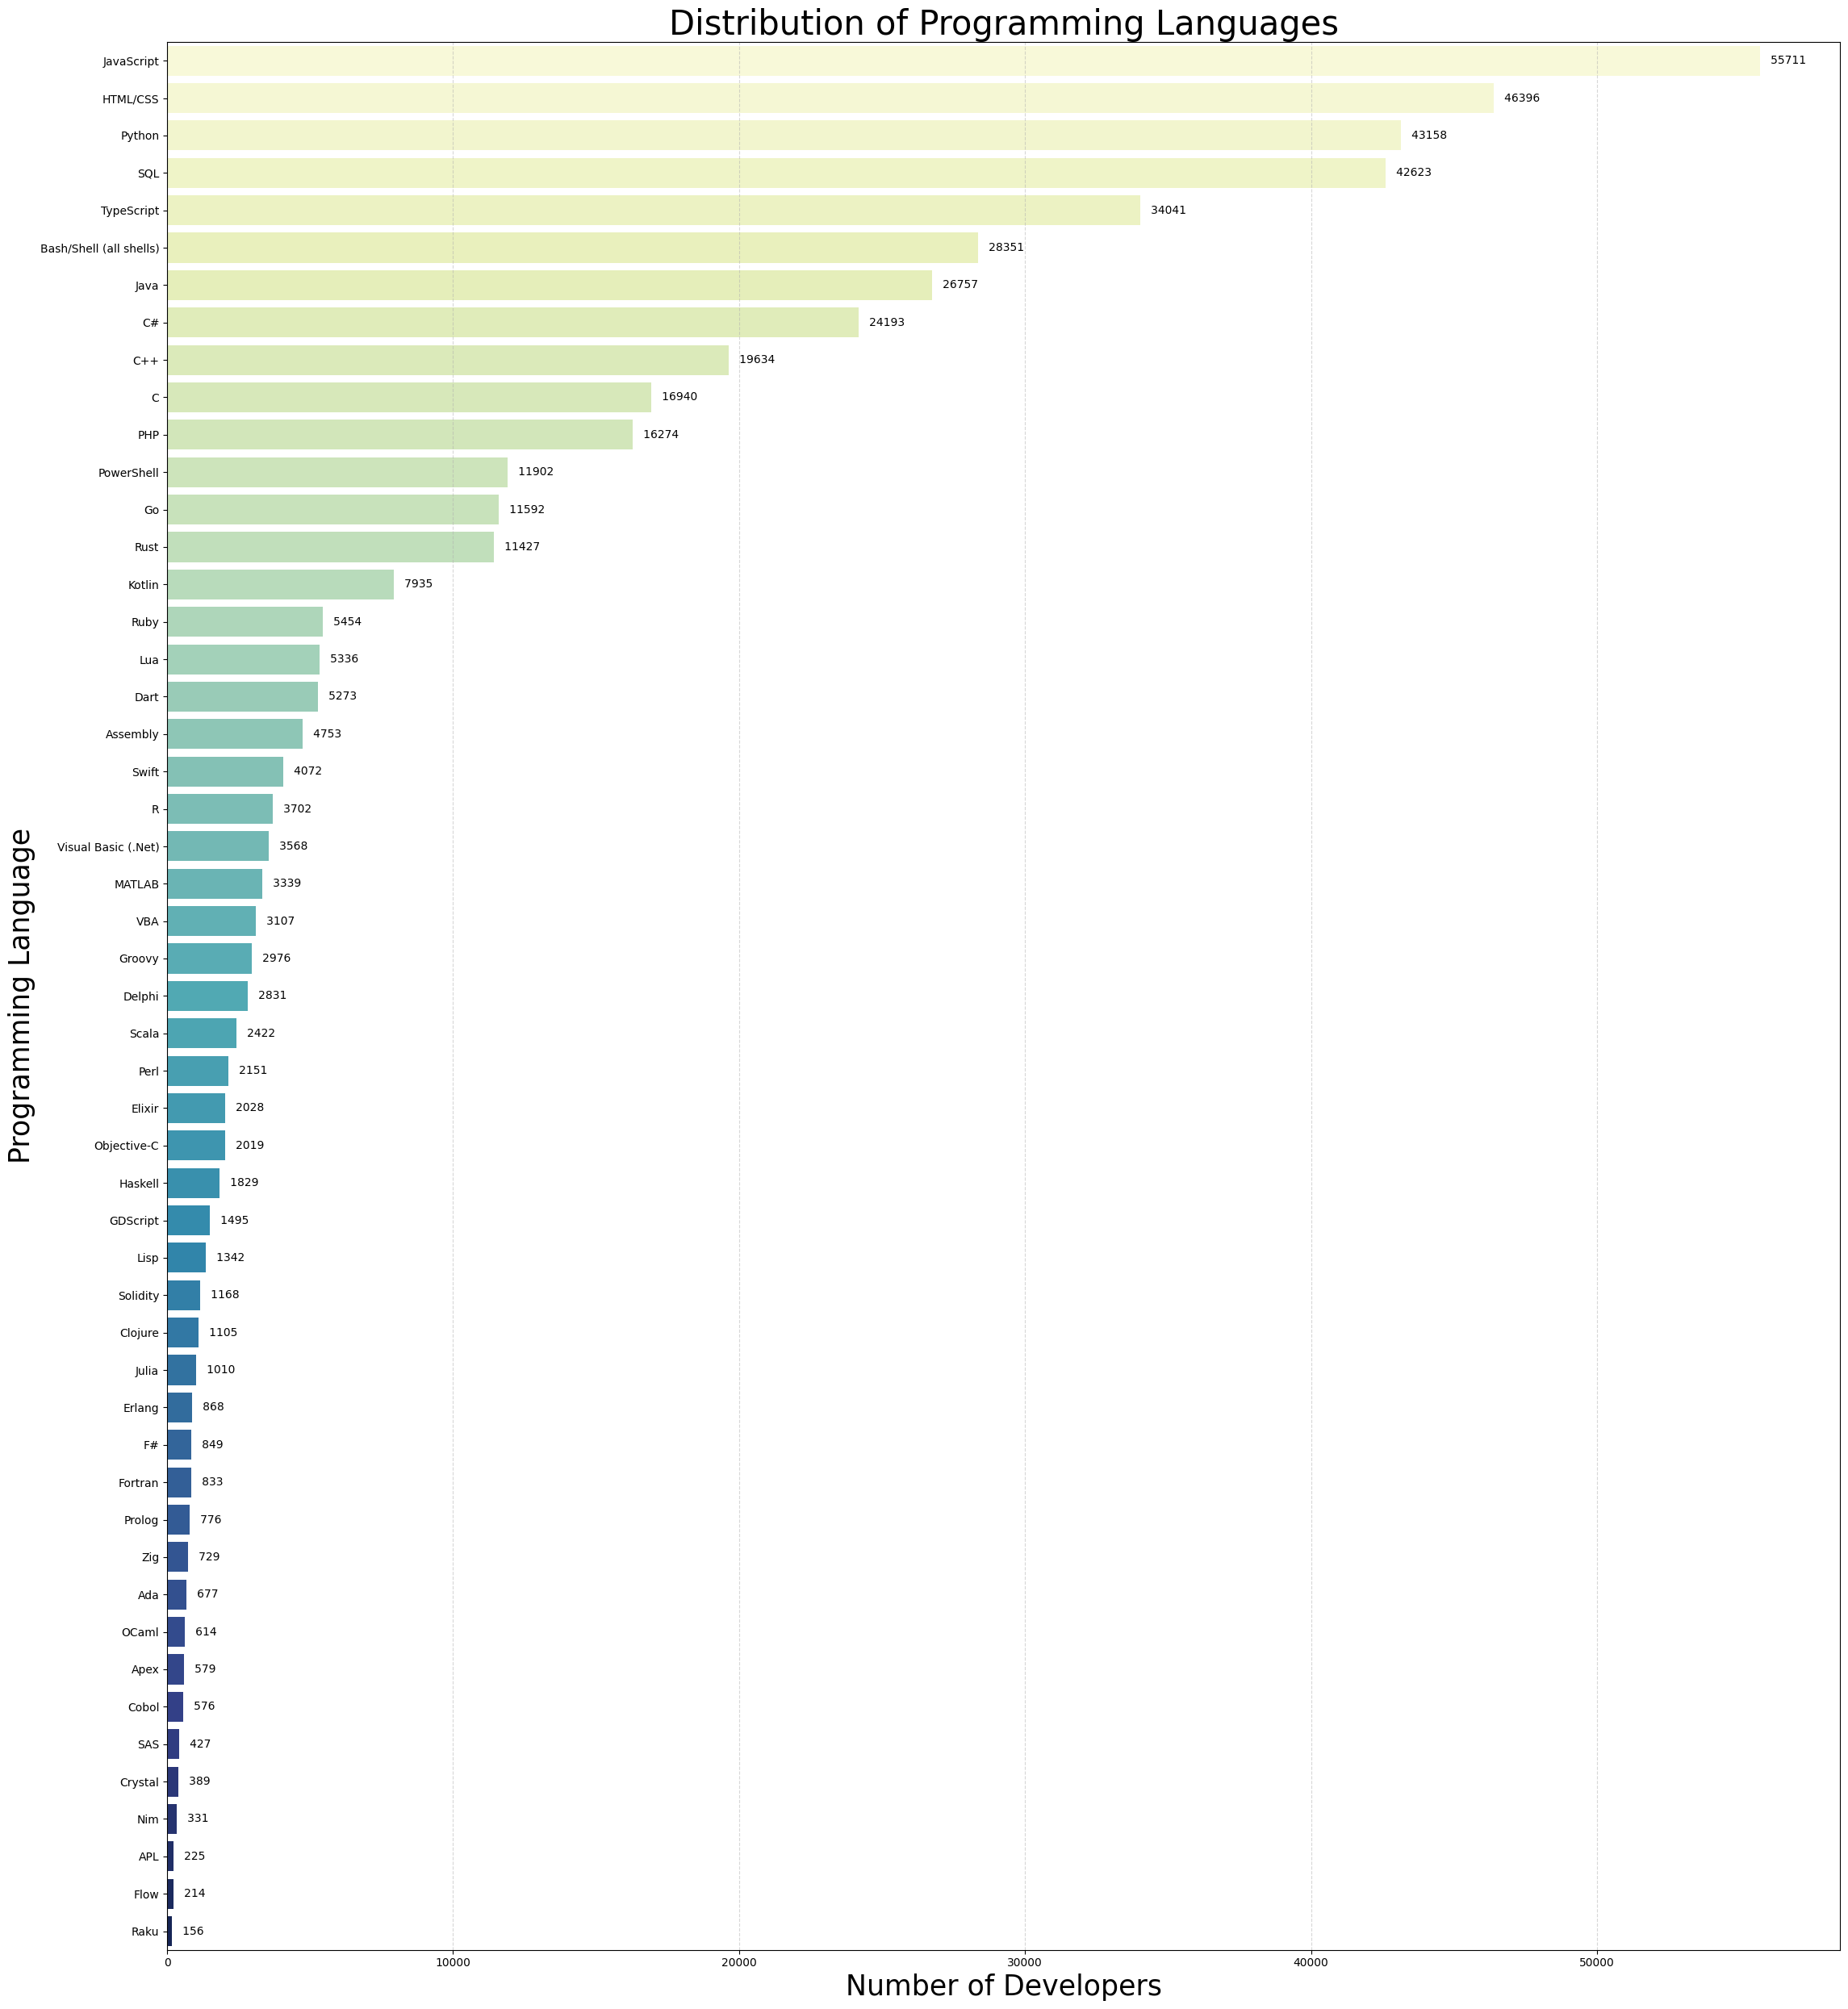

In [36]:
progLanguage = list(progLangDict.keys())
counts = list(progLangDict.values())

plt.figure(figsize=(23, 25))
bar_plot = sns.barplot(x=counts, y=progLanguage, hue=progLanguage, palette="YlGnBu", dodge=False)

# Adding data labels inside the bars
for i, count in enumerate(counts):
    bar_plot.text(count, i, f'   {count}', ha='left', va='center', fontsize=10)

plt.xlabel("Number of Developers", fontsize=25)
plt.ylabel("Programming Language", fontsize=25)
plt.title("Distribution of Programming Languages", fontsize=30)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


> <em>CONCLUSION: From the above graph we can see that languages prominent in Web Development such as HTML, CSS, Javascript, Typescript are one of the most Popular. Multipurpose languages like Python has also gained lot of popularity due to its vast applications in DataScience and Machine Learning. Database Query language like SQL has also made to the top 5 in the list. </em>

#### Percentage of people knowing a particular Language grouped by country: 

In [37]:
country_grp = data.groupby('Country')

# Enter any Language
language = 'Python' 

numRespondents = data['Country'].value_counts()
numKnowLanguage = country_grp['LanguageHaveWorkedWith'].apply(lambda x: (x.str.contains(f"{language}")).sum()).sort_values(ascending=False)
lang_df = pd.concat([numRespondents, numKnowLanguage], axis='columns', sort=False)
lang_df.columns = ['Total_People', f'Know_{language}']
lang_df[r'%_KnowLang'] = round((lang_df[f'Know_{language}'] / lang_df['Total_People']) * 100, 3)
lang_df.head(10)
# lang_df['%_KnowLang'].max()

,Total_People,Know_Python,%_KnowLang
Country,,,
United States of America,18647,10062,53.960
Germany,7328,3686,50.300
India,5625,2793,49.653
United Kingdom of Great Britain and Northern Ireland,5552,2752,49.568
Canada,3507,1784,50.870
France,2933,1501,51.176
Poland,2435,1152,47.310
Netherlands,2383,1125,47.209
Australia,2078,1030,49.567


### <i>*- Median <strong>Salary</strong> Earned in top 3 paid countries for each designation -*</i>

In [15]:
# Percentage of People Who haven`t disclosed their salary
salaryNotConveyed = (data['Salary'].count()/len(data['Salary'])) * 100
print(f"{round(salaryNotConveyed, 2)}% have not disclosed their Salary.")

54.07% have not disclosed their Salary.


In [16]:
salaryData = data['Salary'].dropna()
data.groupby('Country')

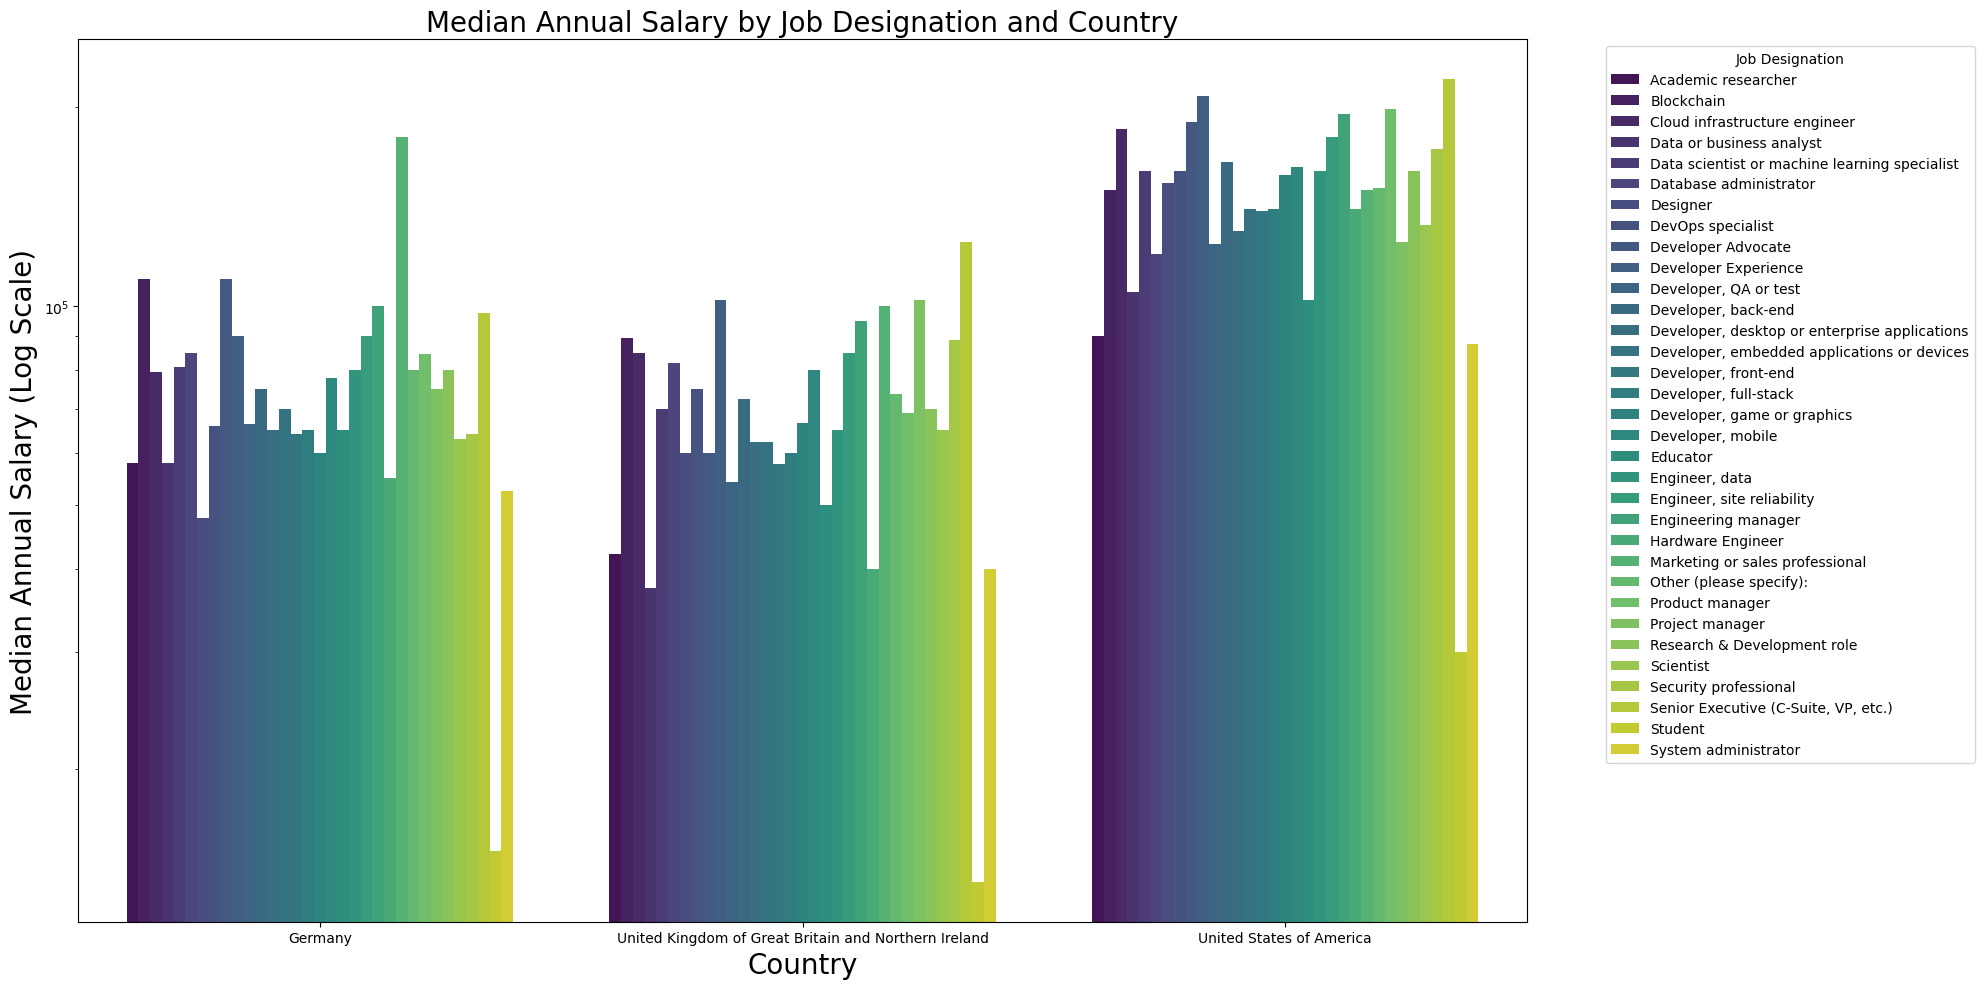

In [17]:
filtered_data = data.dropna(subset=['Salary'])
# Adjusted for Salary

# Group by Country and DevType
grouped_data = filtered_data.groupby(['Country', 'DevType'])['Salary'].median().reset_index()

top_countries = filtered_data['Country'].value_counts().head(3).index
top_grouped_data = grouped_data[grouped_data['Country'].isin(top_countries)]
country = grouped_data.groupby('Country')
india_data = country.get_group('India')
usa_data = country.get_group('United States of America')
list_of_countries_data = [india_data, usa_data]

# for i in country:
#     print(i)

plt.figure(figsize=(20, 10))
sns.barplot(x='Country', y='Salary', hue='DevType', data=top_grouped_data, errorbar=None, palette='viridis')
plt.yscale('log')  
plt.xlabel('Country', fontsize=20)
plt.ylabel('Median Annual Salary (Log Scale)', fontsize=20)
plt.title('Median Annual Salary by Job Designation and Country', fontsize=20)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Job Designation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> <em>CONCLUSION: From above Observation we can see that United States of America on an Average Pays more to each of the designation listed. In germany however, Marketing and Sales Managers are payed much more than other tech designations. The lowest earners are the System Administrators in each cases (Student not considered), while the earning fields are BlockChain, Cloud and Data Engineers or any field related to data analysis or engineering.</em>

### <i>*- Influence of AI and DevAI : Most Used AI For Search and For Web development -*</i>

In [19]:
aiUsed = populateDict(data['AISearchHaveWorkedWith'], delimiter=';')
devAiUsed = populateDict(data['AIDevHaveWorkedWith'], delimiter=';')

In [20]:
# convert to DataFrames
df_ai_search = pd.DataFrame(list(aiUsed.items()), columns=['AI Search Tool', 'Count'])
df_ai_dev = pd.DataFrame(list(devAiUsed.items()), columns=['AI Dev Tool', 'Count'])

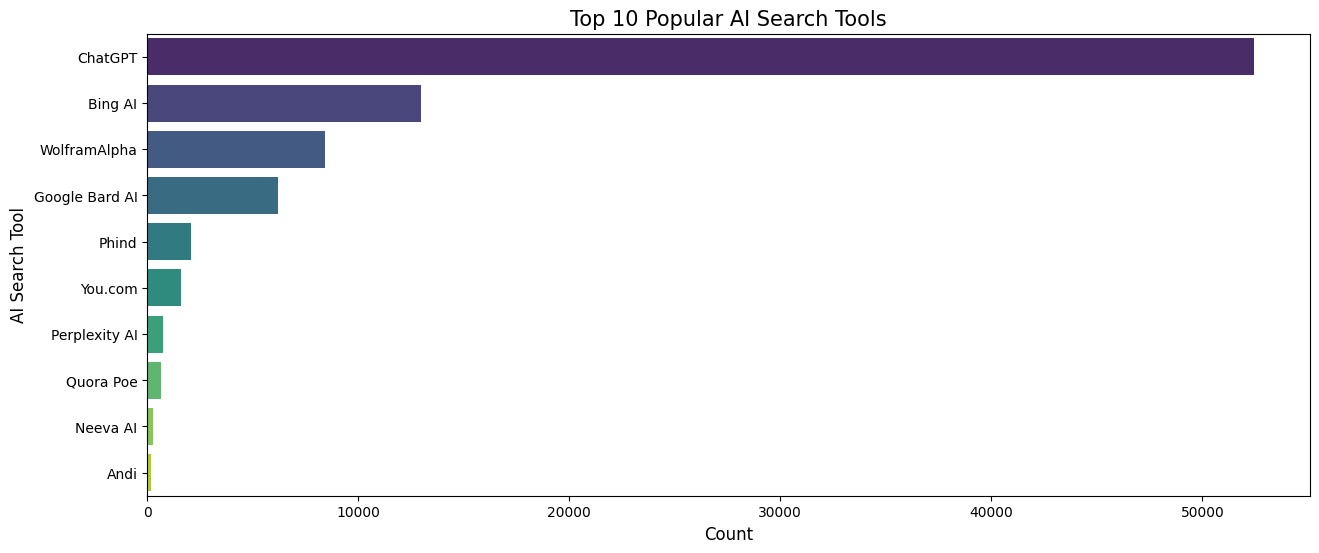

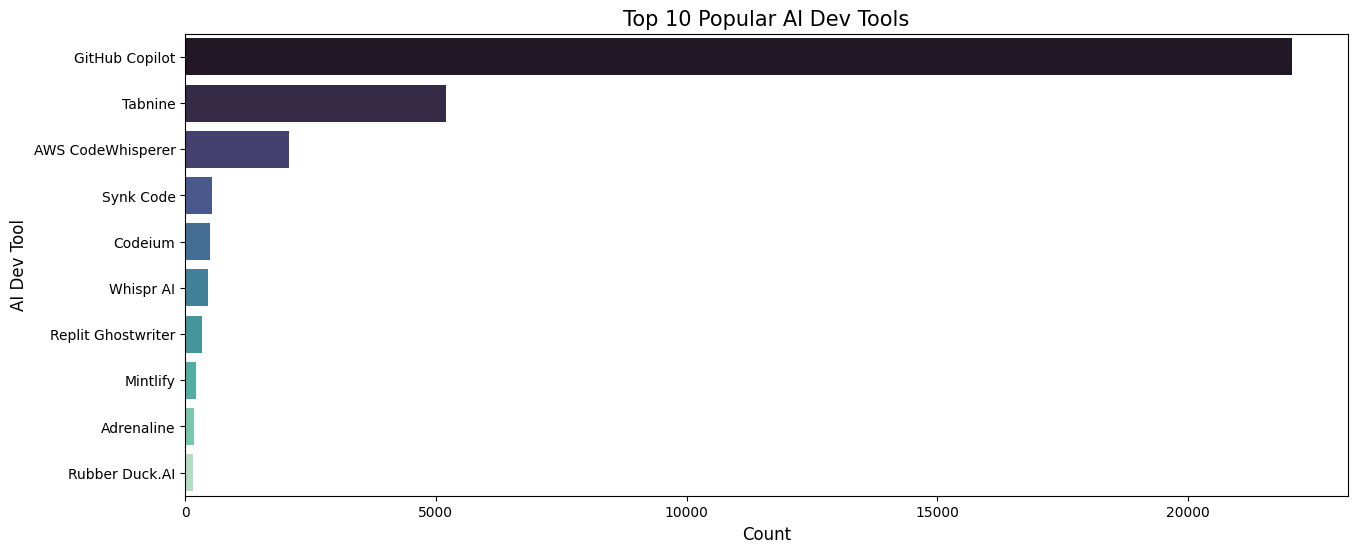

In [21]:
# Plotting AI Search Tools
plt.figure(figsize=(15, 6))
sns.barplot(x='Count', y='AI Search Tool', data=df_ai_search.sort_values(by='Count', ascending=False).head(10), hue='AI Search Tool',palette='viridis')
plt.title('Top 10 Popular AI Search Tools', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('AI Search Tool', fontsize=12)
plt.show()

# Plotting AI Dev Tools
plt.figure(figsize=(15, 6))
sns.barplot(x='Count', y='AI Dev Tool', data=df_ai_dev.sort_values(by='Count', ascending=False).head(10), hue='AI Dev Tool',palette='mako')
plt.title('Top 10 Popular AI Dev Tools', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('AI Dev Tool', fontsize=12)
plt.show()

> <em> CONCLUSION:  From Above Observation can see that AI search Tools like ChatGPT and AI dev Tools like GitHub Copilot are more significantly used than their counterparts. Wolfram Alpha which is mostly used for MathWorks and complex math calculations and analysis also made it to top 3 spot. </em>

### <i>*- Scatter plot showing the relation between Salary and Work Experience of a Country -*</i>

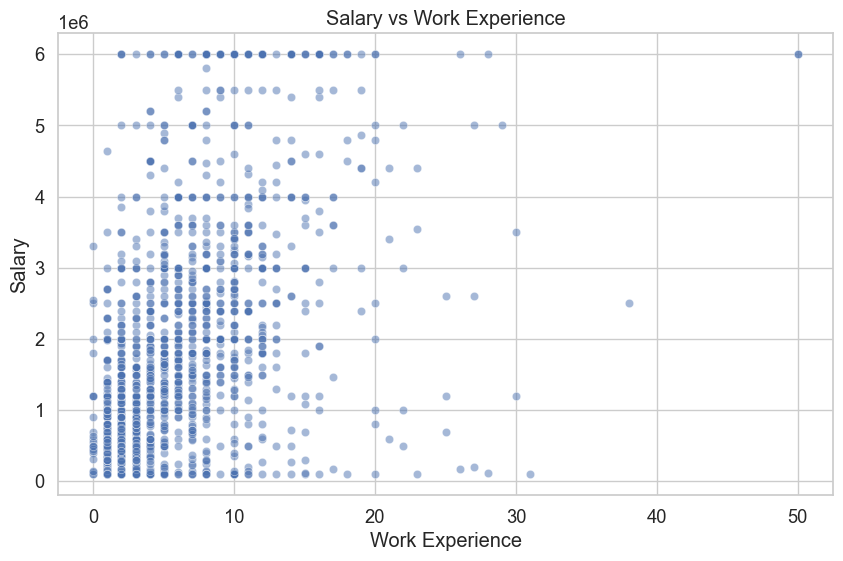

In [336]:
country = 'India'
df = data.groupby('Country')
salaryWork = df.get_group(country)[['Salary', 'WorkExp']].dropna()

# # Calculate the IQR for 'Salary'
# Q1 = salaryWork['Salary'].quantile(0.25)
# Q3 = salaryWork['Salary'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the lower and upper bounds to filter out outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Remove outliers
# filtered_df = salaryWork[(salaryWork['Salary'] >= lower_bound) & (salaryWork['Salary'] <= upper_bound)]

salaryWork['Salary'] = mstats.winsorize(salaryWork['Salary'], limits=[0.05, 0.05])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='WorkExp', y='Salary', data=salaryWork, alpha=0.5)
plt.title('Salary vs Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

### <i>*- Correlation, kurtosis graphs and skewness of Salary and work experience -*</i>

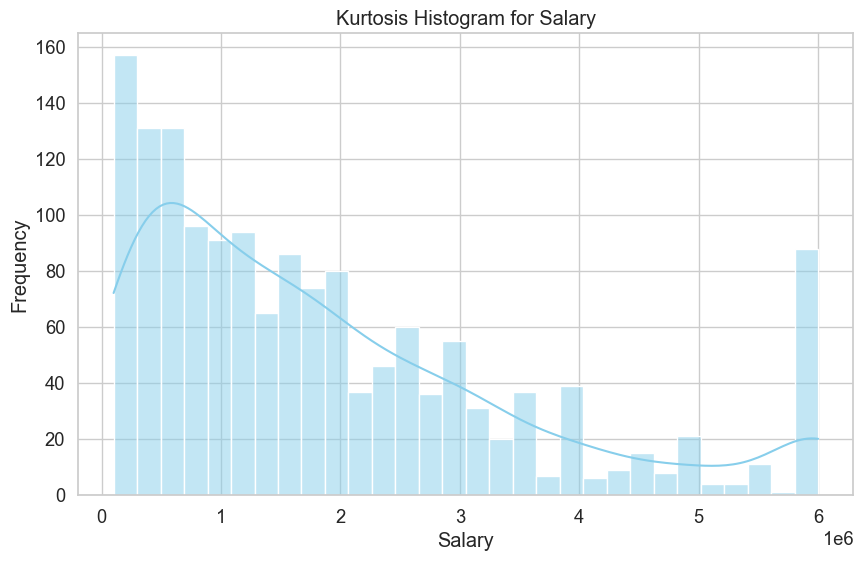

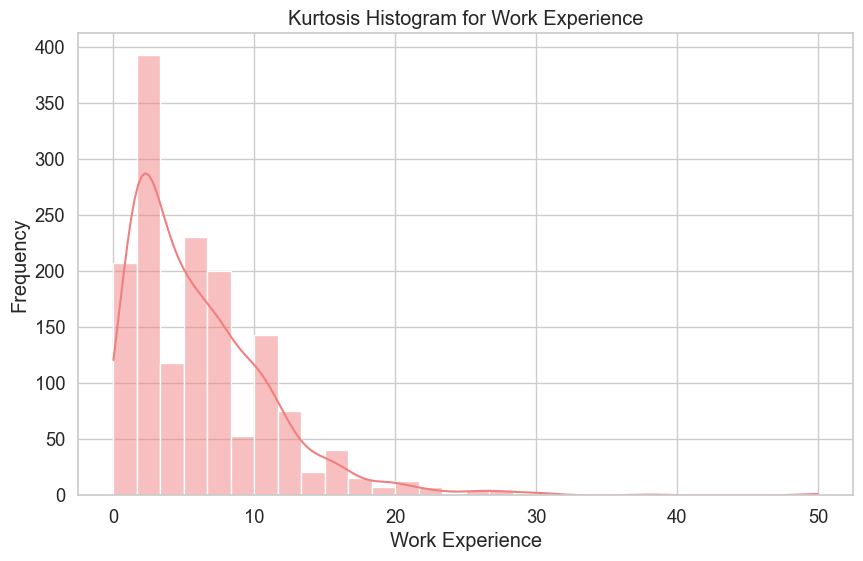




			KURTOSIS OF SALARY: 0.455 | SKEWNESS OF SALARY: 1.108
			KURTOSIS OF WORK EXPERIENCE: 9.006 | SKEWNESS OF WORK EXPERIENCE: 2.108
			CORRELATION OF SALARY AND WORK EXPERIENCE: 0.478


In [332]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

# SALARY KURTOSIS AND SKEWNESS
plt.figure(figsize=(10, 6))
sns.histplot(salaryWork['Salary'], kde=True, bins=30, color='skyblue')
plt.title('Kurtosis Histogram for Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

salary_kurt = kurtosis(salaryWork['Salary'])
salary_skew = skew(salaryWork['Salary'])

# WORK EXP KURTOSIS AND SKEWNESS
plt.figure(figsize=(10, 6))
sns.histplot(salaryWork['WorkExp'], kde=True, bins=30, color='lightcoral')
plt.title('Kurtosis Histogram for Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

work_kurt = kurtosis(salaryWork['WorkExp'])
work_skew = skew(salaryWork['WorkExp'])

print("\n\n")
print(f"\t\t\tKURTOSIS OF SALARY: {salary_kurt:.3f} | SKEWNESS OF SALARY: {salary_skew:.3f}")
print(f"\t\t\tKURTOSIS OF WORK EXPERIENCE: {work_kurt:.3f} | SKEWNESS OF WORK EXPERIENCE: {work_skew:.3f}")

correlation = salaryWork['WorkExp'].corr(salaryWork['Salary'])
print(f"\t\t\tCORRELATION OF SALARY AND WORK EXPERIENCE: {correlation:.3f}")


### -- <i>VIEWING DATA SET AND ATTRIBUTES</i> --

In [22]:
data.shape

(89184, 82)

In [23]:
data['LearnCode']

ResponseId
1                                                      NaN
2        Books / Physical media;Colleague;Friend or fam...
3        Books / Physical media;Colleague;On the job tr...
4        Colleague;Friend or family member;Other online...
5        Books / Physical media;Online Courses or Certi...
                               ...                        
89180    Online Courses or Certification;Other online r...
89181    Colleague;Online Courses or Certification;Othe...
89182    Books / Physical media;Hackathons (virtual or ...
89183    Online Courses or Certification;Other online r...
89184    Colleague;Online Courses or Certification;Othe...
Name: LearnCode, Length: 89184, dtype: object

In [38]:
salAndCountry = data[['Total_Salary', 'Country', 'Currency']].dropna()
groupedSalData = salAndCountry.groupby('Country')
medianSalData = dict(groupedSalData['Total_Salary'].median()) # not adjusted for currency
pattern = r'^[A-Z]{3}'
for i in groupedSalData:
    currencyData = pd.DataFrame(i[1]['Currency'])
    # print(currencyData.head(1))
#     result = re.search(pattern, i[])

In [25]:
data.isna().sum()

MainBranch              0
Age                     0
Employment           1286
RemoteWork          15374
CodingActivities    15420
                    ...  
ProfessionalTech    47401
Industry            52410
SurveyLength         2699
SurveyEase           2630
Total_Salary        41165
Length: 82, dtype: int64

In [26]:
len(data.columns), (data.columns)

(82,
 Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities',
        'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert',
        'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence',
        'TechList', 'BuyNewTool', 'Country', 'Currency', 'Salary',
        'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
        'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
        'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
        'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
        'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
        'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
        'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
        'OpSysPersonal use', 'OpSysProfessional use',
        'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
        'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
        'AISearchHaveWorkedWith', 'AISearchWantToWorkWith'

In [27]:
data[['AISearchHaveWorkedWith', 'AISearchWantToWorkWith', 'AIDevHaveWorkedWith']].head(30).dropna()
data['Industry'].head(30).dropna()

ResponseId
2     Information Services, IT, Software Development...
3     Information Services, IT, Software Development...
5                                                 Other
6                                                 Other
7     Information Services, IT, Software Development...
8                                    Financial Services
11                                                Other
13                                                Other
14    Information Services, IT, Software Development...
15                                                Other
16       Manufacturing, Transportation, or Supply Chain
18                         Retail and Consumer Services
20    Information Services, IT, Software Development...
21                                     Higher Education
25    Information Services, IT, Software Development...
26    Information Services, IT, Software Development...
27    Information Services, IT, Software Development...
29       Manufacturing, Transportatio

In [231]:
data.select_dtypes(include=[int, float])

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,Salary,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,Total_Salary
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,2.850000e+05,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,2.500000e+05,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN